In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import specgram
from prettytable import PrettyTable
from scipy import fftpack, arange
from scipy.io import wavfile
import time
import numpy as nump
import pandas as pand
import librosa
import librosa.display
import matplotlib.pyplot as plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing all the external python classes created for this project
from WritingtoCSV import WritingCSV
from Generategraphs import Graphs
from ClassificationAlgorithms import Algorithms
from ProcessingData import Preprocessing

#Preprocessing class includes the converstion of audio file to machine readable data
data_processing = Preprocessing()
#WritingCSV class includes creation of new column and update the column values in excel
writing_csv = WritingCSV()
#Graphs class includes all the neccesary code for plotting the curves
g_graphs = Graphs()
#Algorithms class includes the Machine learning algorithms that are being used for this Urban sound classifications
classificationAlgorithms = Algorithms()

In [3]:
#Reading the csv file through csv
#Download the full data set form : https://urbansounddataset.weebly.com/download-urbansound8k.html
d_data=pand.read_csv(r'H:\archive\UrbanSoundsdata.csv')
#Printing the first five rows for better understanding
print(d_data.head(5))
print('\n')
#To represent what are all the types of audio classes present in audio files
print(set(d_data['Class']))

   Unnamed: 0    slice_file_name    fsID  start   end  salience  fold  \
0           0   100852-0-0-0.wav  100852    0.0   4.0         1     5   
1           1   100852-0-0-1.wav  100852    0.5   4.5         1     5   
2           2  100852-0-0-10.wav  100852    5.0   9.0         1     5   
3           3  100852-0-0-11.wav  100852    5.5   9.5         1     5   
4           4  100852-0-0-12.wav  100852    6.0  10.0         1     5   

   classID            Class                                       filelocation  
0        0  air_conditioner  C:\Users\gubba\Downloads\archive\fold5\100852-...  
1        0  air_conditioner  C:\Users\gubba\Downloads\archive\fold5\100852-...  
2        0  air_conditioner  C:\Users\gubba\Downloads\archive\fold5\100852-...  
3        0  air_conditioner  C:\Users\gubba\Downloads\archive\fold5\100852-...  
4        0  air_conditioner  C:\Users\gubba\Downloads\archive\fold5\100852-...  


{'gun_shot', 'children_playing', 'street_music', 'jackhammer', 'dog_bark'

In [4]:
#writetocsv is the method which is responsible for updating the audio file location in csv
d_data = writing_csv.writetocsv(d_data)
d_data.head(5)

,Unnamed: 0,slice_file_name,fsID,start,end,salience,fold,classID,Class,filelocation
0,0,100852-0-0-0.wav,100852,0.0,4.0,1,5,0,air_conditioner,H:\archive\fold5\100852-0-0-0.wav
1,1,100852-0-0-1.wav,100852,0.5,4.5,1,5,0,air_conditioner,H:\archive\fold5\100852-0-0-1.wav
2,2,100852-0-0-10.wav,100852,5.0,9.0,1,5,0,air_conditioner,H:\archive\fold5\100852-0-0-10.wav
3,3,100852-0-0-11.wav,100852,5.5,9.5,1,5,0,air_conditioner,H:\archive\fold5\100852-0-0-11.wav
4,4,100852-0-0-12.wav,100852,6.0,10.0,1,5,0,air_conditioner,H:\archive\fold5\100852-0-0-12.wav


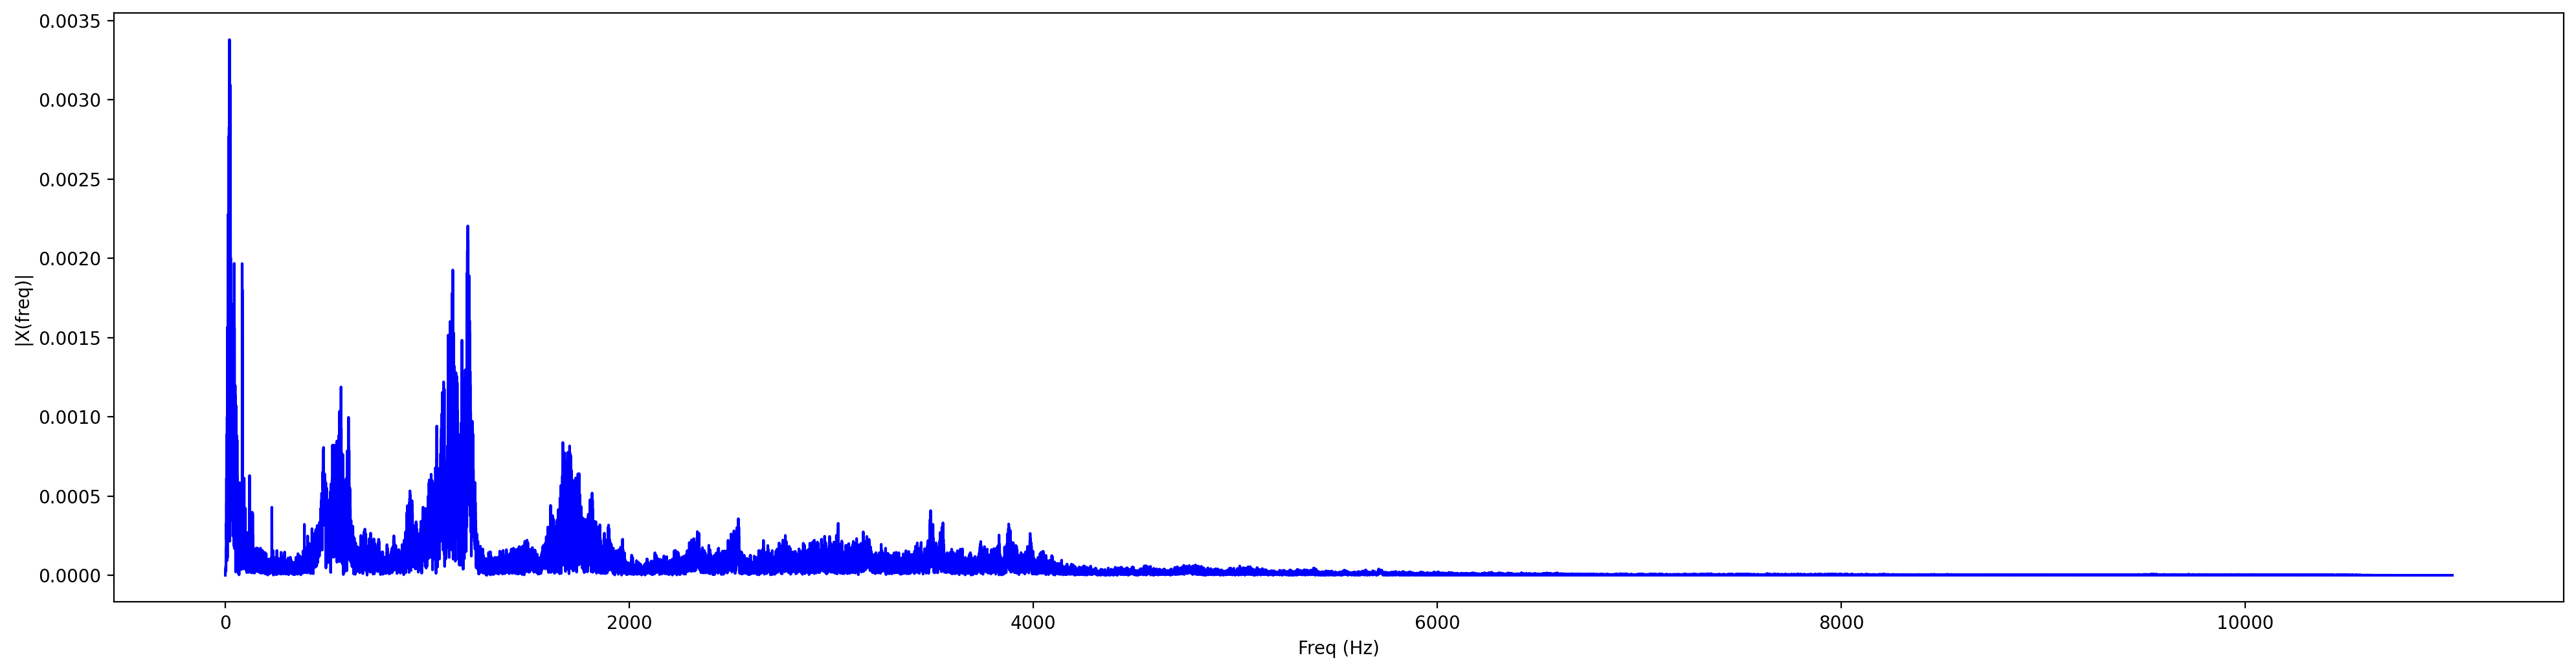

In [5]:
#This following lines of code represents how the actual signal looks like under different method of usages
soundwave_f_P_s = ["H:\\archive\\fold8\\17009-2-0-4.wav"]
f,t = librosa.load(soundwave_f_P_s[0])
s_d = ["Children Playing"]
#librosa_load_Files is a method to convert the sound wave to meaningful data
ds = data_processing.librosa_load_Files(soundwave_f_P_s)

g_graphs.waves(s_d,ds)
g_graphs.spectrogram(s_d,ds)
g_graphs.log_Power_Spectrogram(s_d,ds)
g_graphs.spectrum(f, t)

In [6]:
#job() is a function located in Preprocessing class which is responsible for normalizing each and every audio file 
#to machine readble data through some machine learning algoriths namely librosa
X, Y, d_s = data_processing.job(d_data)
#Upon successfull data transition dividing data for train and test parts
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle = True)

In [7]:
#As algorithm class contains all the classification algorithms that are being used in this project
#Random forest, Bagging classifier, Gradient Boosting, KNN
RFCaccuarcy = classificationAlgorithms.Randomforestclassifier(d_s,X_train,Y_train,X_test,Y_test)
BCaccuarcy = classificationAlgorithms.Baggingclassifier(d_s,X_train,Y_train,X_test,Y_test)
GBaccuarcy = classificationAlgorithms.Gradientboostingclassifier(d_s,X_train,Y_train,X_test,Y_test)
KNNaccuarcy = classificationAlgorithms.Knearestneighbors(X_train,Y_train,X_test,Y_test)

Random Forest Classifier Accuracy:  0.8937242327072835
Bagging Classifier Accuracy:  0.8176820888685296
Gradient Boosting Classifier:  0.8341731562070546
K-Nearest Neighbors Accuracy:  0.8831882730187814


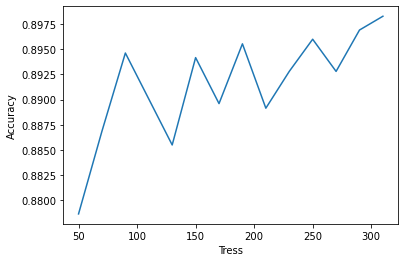

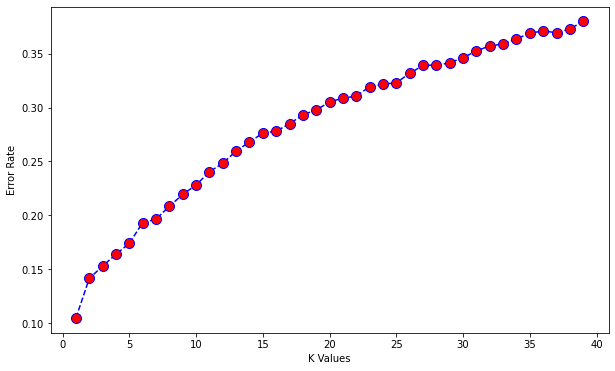

In [8]:
#Graph for Random forest classifier represent Tress vs Accuracy
classificationAlgorithms.Randomforestclassifiergraph(d_s,X_train,Y_train,X_test,Y_test)
#Graph for KNN Kvalues vs Error rate
classificationAlgorithms. Knearestneighborsgraph(X_train,Y_train,X_test,Y_test)

In [9]:
#Finally, Pretty table for printing the above information in nice format
d=PrettyTable()
d.field_names = ["Algorithm", "Accuracy"]
d.add_rows(
    [
        ["RandomForestClassifier", RFCaccuarcy],
        ["BaggingClassifier", BCaccuarcy],
        ["GradientBoostingClassifier", GBaccuarcy],
        ["KNeighborsClassifier", KNNaccuarcy],
    ]
)
d

Algorithm,Accuracy
RandomForestClassifier,0.8937242327072835
BaggingClassifier,0.8176820888685296
GradientBoostingClassifier,0.8341731562070546
KNeighborsClassifier,0.8831882730187814
